# Curso de Macroeconomia I
# Prof. Cássio Besarria
# Tópico: Dados conjunturais

In [1]:
# Baixar dados BCB
# Quarterly GDP (1995=100) - seasonally adjusted data - GDP at market prices
# Code: BCB/1253
# link: https://www.quandl.com/data/BCB/1253-Quarterly-GDP-1995-100-seasonally-adjusted-data-GDP-at-market-prices

# Biblioteca

In [68]:
#!pip install quandl
import quandl

# Importação de dados

In [69]:
GDP = quandl.get(["BCB/1253"], trim_start='2000-01-01', trim_end='2020-03-31') 

In [4]:
print(GDP.index) 

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
      

In [71]:
print(GDP.head(10))

            BCB/1253 - Value
Date                        
2000-03-31            109.24
2000-06-30            109.66
2000-09-30            110.81
2000-12-31            112.26
2001-03-31            112.74
2001-06-30            112.20
2001-09-30            111.34
2001-12-31            111.41
2002-03-31            112.80
2002-06-30            114.32


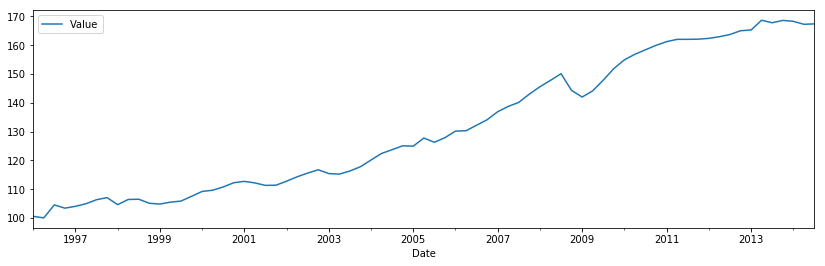

In [72]:
quandl.get('BCB/1253', start_date="1995-01-01").plot(figsize=(14, 4)); # GDP 

In [73]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm #permite estimar modelos, realizar testes estatistícos
import statsmodels.graphics as graf 
import statsmodels.api as sm

In [74]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(GDP, 1600) # Estou utilizando o fator de suavização lambda = 1600, referente a dados trimestrais

In [75]:
ip_decomp_hp = GDP[['BCB/1253 - Value']] # aqui estou selecionando a coluna de valores
ip_decomp_hp["cycle"] = hp_cycle
ip_decomp_hp["trend"] = hp_trend

In [76]:
ip_decomp_hp.head()

,BCB/1253 - Value,cycle,trend
Date,,,
2000-03-31,109.24,1.247386,107.992614
2000-06-30,109.66,0.979819,108.680181
2000-09-30,110.81,1.441472,109.368528
2000-12-31,112.26,2.200953,110.059047
2001-03-31,112.74,1.985970,110.754030


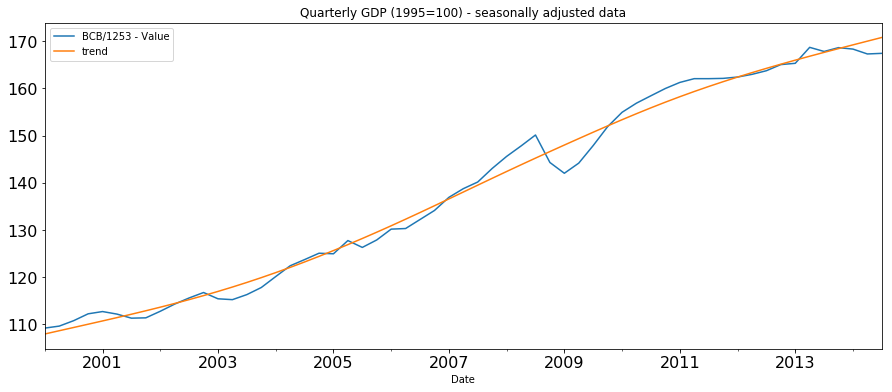

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ip_decomp_hp[["BCB/1253 - Value", "trend"]]["1995-01-01":].plot(ax=ax, fontsize=16);
plt.title('Quarterly GDP (1995=100) - seasonally adjusted data')
plt.savefig('GDP')
plt.show()

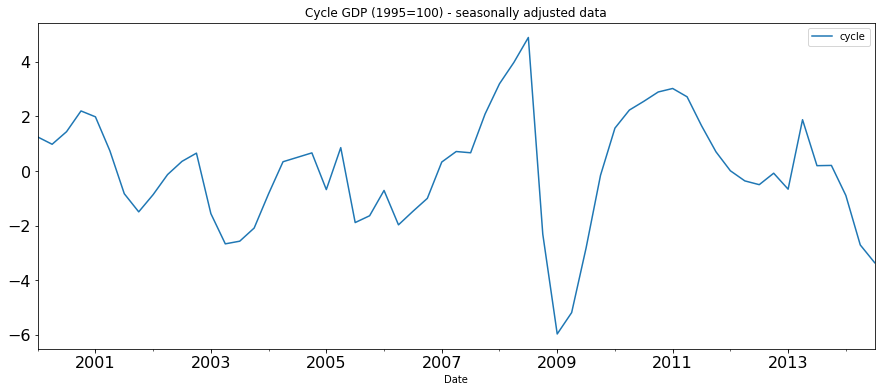

In [79]:
fig, ax = plt.subplots()
ip_decomp_hp[['cycle']]['1995-01-01':].plot(ax=ax, fontsize=16)
plt.title('Cycle GDP (1995=100) - seasonally adjusted data')
plt.savefig('cycle_GDP')
plt.show()

# GDP per capita at current prices in US$

In [13]:
GDP_per = quandl.get(["BCB/7325"], trim_start='1962-01-01', trim_end='2012-12-31')

In [14]:
print(GDP_per.head(10))

            BCB/7325 - Value
Date                        
1962-12-31            270.48
1963-12-31            316.17
1964-12-31            277.23
1965-12-31            283.14
1966-12-31            345.00
1967-12-31            367.31
1968-12-31            389.81
1969-12-31            415.02
1970-12-31            457.12
1971-12-31            515.05


In [15]:
hp_cycle_per, hp_trend_per = sm.tsa.filters.hpfilter(GDP_per, 100)

In [16]:
ip_decomp_hp_per = GDP_per[['BCB/7325 - Value']]
ip_decomp_hp_per["cycle"] = hp_cycle_per
ip_decomp_hp_per["trend"] = hp_trend_per

In [17]:
ip_decomp_hp_per.head()

,BCB/7325 - Value,cycle,trend
Date,,,
1962-12-31,270.48,91.322353,179.157647
1963-12-31,316.17,102.875234,213.294766
1964-12-31,277.23,28.884892,248.345108
1965-12-31,283.14,-3.110650,286.250650
1966-12-31,345.00,15.757784,329.242216


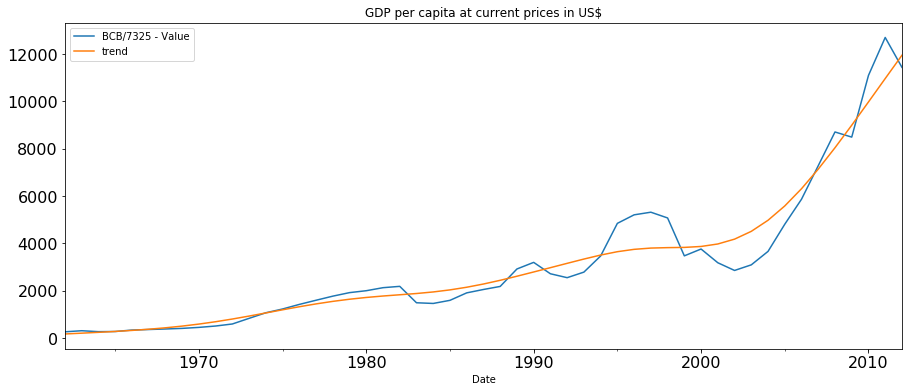

In [18]:
fig, ax = plt.subplots()
ip_decomp_hp_per[["BCB/7325 - Value", "trend"]]["1962-01-01":].plot(ax=ax, fontsize=16);
plt.title('GDP per capita at current prices in US$')
plt.savefig('GDP_per_capita')
plt.show()

# Unemployment

In [19]:
Unemp = quandl.get(["BCB/24369"], trim_start='2002-03-01', trim_end='2019-06-30')

In [20]:
print(Unemp.head(10))

            BCB/24369 - Value
Date                         
2012-03-31                7.9
2012-04-30                7.7
2012-05-31                7.6
2012-06-30                7.5
2012-07-31                7.4
2012-08-31                7.3
2012-09-30                7.1
2012-10-31                6.9
2012-11-30                6.8
2012-12-31                6.9


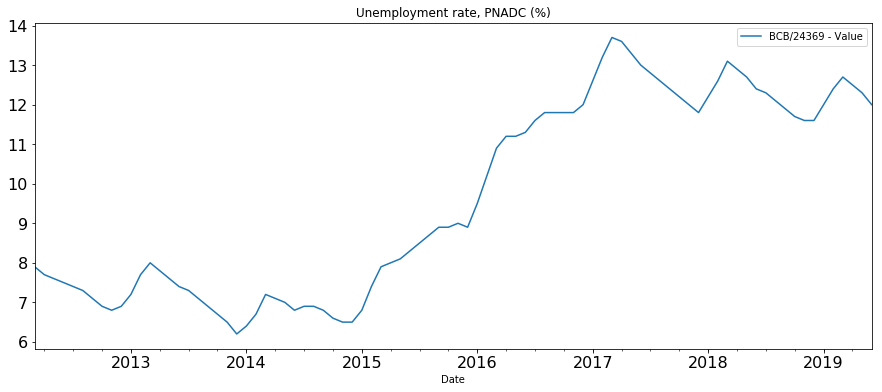

In [21]:
fig, ax = plt.subplots()
Unemp[["BCB/24369 - Value"]]["2002-03-01":].plot(ax=ax, fontsize=16);
plt.title('Unemployment rate, PNADC (%)')
plt.savefig('unemployment')
plt.show()

# Inflation

In [22]:
Inf = quandl.get(["BCB/13522"], trim_start='2002-03-01', trim_end='2019-03-31')

In [23]:
print(Inf.head(10))

            BCB/13522 - Value
Date                         
2002-03-31               7.75
2002-04-30               7.98
2002-05-31               7.77
2002-06-30               7.66
2002-07-31               7.51
2002-08-31               7.46
2002-09-30               7.93
2002-10-31               8.45
2002-11-30              10.93
2002-12-31              12.53


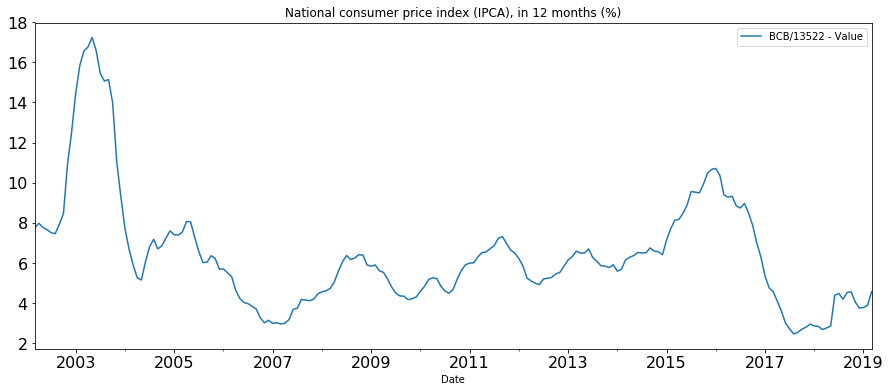

In [24]:
fig, ax = plt.subplots()
Inf[["BCB/13522 - Value"]]["2002-03-01":].plot(ax=ax, fontsize=16);
plt.title('National consumer price index (IPCA), in 12 months (%)')
plt.savefig('inflation')
plt.show()

# Implicit deflator

In [25]:
Def = quandl.get(["BCB/1211"], trim_start='2000-01-01', trim_end='2019-06-30')

In [26]:
print(Def.head(10))

            BCB/1211 - Value
Date                        
2000-12-31              5.61
2001-12-31              8.23
2002-12-31              9.80
2003-12-31             14.09
2004-12-31              7.75
2005-12-31              7.43
2006-12-31              6.77
2007-12-31              6.44
2008-12-31              8.78
2009-12-31              7.31


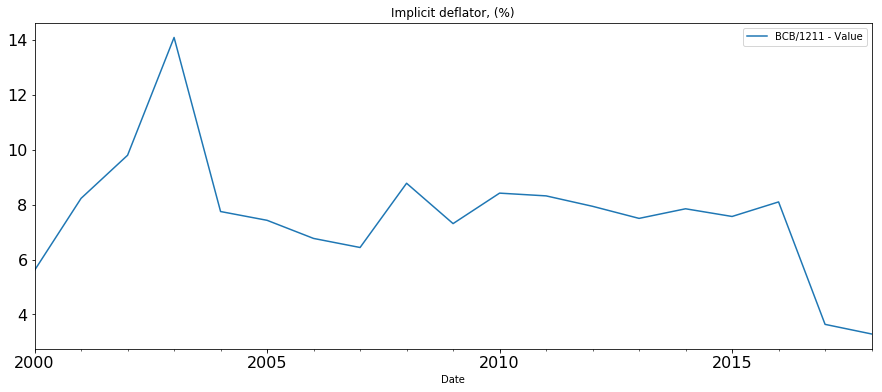

In [27]:
fig, ax = plt.subplots()
Def[["BCB/1211 - Value"]]["2000-01-01":].plot(ax=ax, fontsize=16);
plt.title('Implicit deflator, (%)')
plt.savefig('unemployment')
plt.show()

In [28]:
Def_02 = (1 + Def/100)

[]

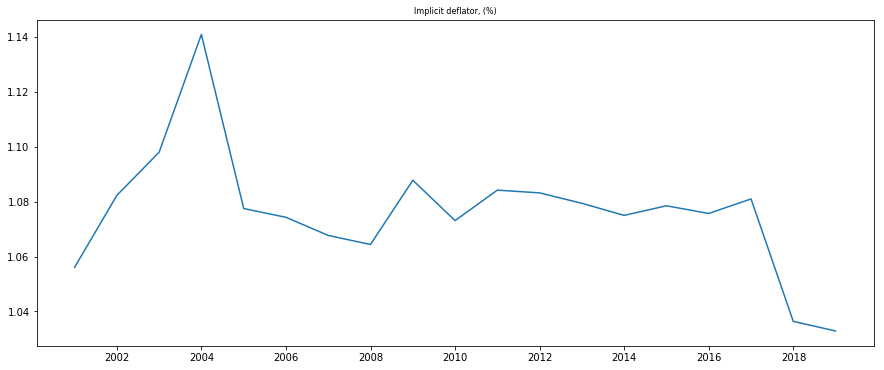

In [29]:
# Plot
plt.plot(Def_02)
plt.title('Implicit deflator, (%)', fontsize=8)
plt.plot()

# Salvando dados de Inflação e Desemprego

In [80]:
import os

In [81]:
os.chdir("C:\\Users\\CASSIO\\OneDrive\\UFPB\\Macroeconomia\\Aplicacoes_Python") # Definir um diretório

In [82]:
Unemp.to_csv("Unemp.csv") # salvando o banco de dados

In [83]:
Inf.to_csv("Inf.csv")

In [84]:
import pandas as pd

In [85]:
a = pd.read_csv("Unemp.csv")
b = pd.read_csv("Inf.csv")

In [86]:
merged = a.merge(b)
merged.to_csv("output.csv", index=False)

In [87]:
from pandas import read_csv

In [88]:
series = read_csv('output.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

In [89]:
print(series.head(10))

            BCB/24369 - Value  BCB/13522 - Value
Date                                            
2012-03-31                7.9               5.24
2012-04-30                7.7               5.10
2012-05-31                7.6               4.99
2012-06-30                7.5               4.92
2012-07-31                7.4               5.20
2012-08-31                7.3               5.24
2012-09-30                7.1               5.28
2012-10-31                6.9               5.45
2012-11-30                6.8               5.53
2012-12-31                6.9               5.84


In [40]:
from matplotlib import pyplot

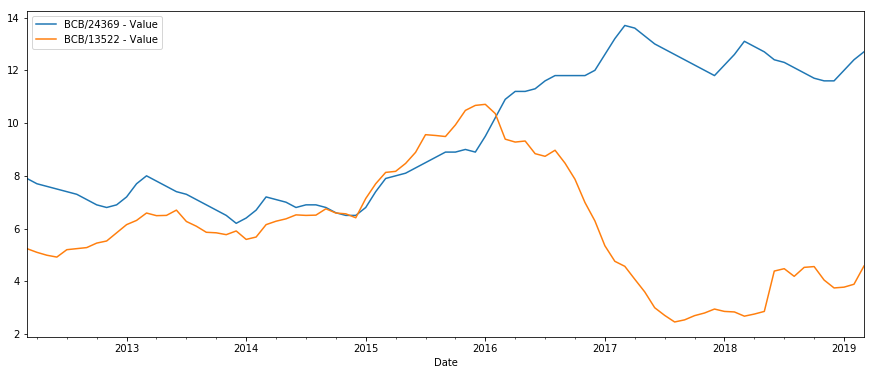

In [90]:
series.plot()
pyplot.show()

# Estatísticas descritivas

In [91]:
series.describe()

,BCB/24369 - Value,BCB/13522 - Value
count,85.000000,85.000000
mean,9.562353,6.050588
std,2.493514,2.220487
min,6.200000,2.460000
25%,7.200000,4.530000
50%,8.900000,5.910000
75%,12.000000,7.140000
max,13.700000,10.710000


# Histograma

C:\Users\CASSIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


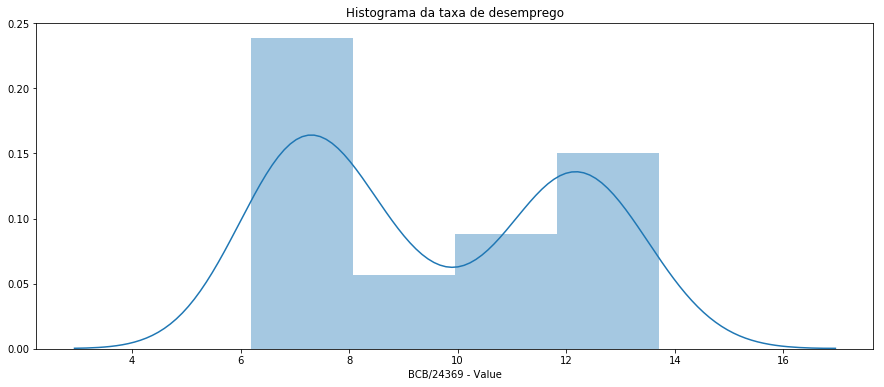

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
hist, ax = plt.subplots()
ax = sns.distplot(series['BCB/24369 - Value'])
ax.set_title('Histograma da taxa de desemprego')
plt.show()

# Criando logaritmo das séries

In [95]:
import numpy as np
series['logdesemprego'] = np.log(series['BCB/24369 - Value'])
series['loginflacao'] = np.log(series['BCB/13522 - Value'])

In [96]:
series

,BCB/24369 - Value,BCB/13522 - Value,logdesemprego,loginflacao
Date,,,,
2012-03-31,7.9,5.24,2.066863,1.656321
2012-04-30,7.7,5.10,2.041220,1.629241
2012-05-31,7.6,4.99,2.028148,1.607436
2012-06-30,7.5,4.92,2.014903,1.593309
2012-07-31,7.4,5.20,2.001480,1.648659
...,...,...,...,...
2018-11-30,11.6,4.05,2.451005,1.398717
2018-12-31,11.6,3.75,2.451005,1.321756
2019-01-31,12.0,3.78,2.484907,1.329724


In [97]:
series['log_razao'] = np.log(series['BCB/24369 - Value']/series['BCB/13522 - Value'])
series

,BCB/24369 - Value,BCB/13522 - Value,logdesemprego,loginflacao,log_razao
Date,,,,,
2012-03-31,7.9,5.24,2.066863,1.656321,0.410541
2012-04-30,7.7,5.10,2.041220,1.629241,0.411980
2012-05-31,7.6,4.99,2.028148,1.607436,0.420712
2012-06-30,7.5,4.92,2.014903,1.593309,0.421594
2012-07-31,7.4,5.20,2.001480,1.648659,0.352821
...,...,...,...,...,...
2018-11-30,11.6,4.05,2.451005,1.398717,1.052288
2018-12-31,11.6,3.75,2.451005,1.321756,1.129249
2019-01-31,12.0,3.78,2.484907,1.329724,1.155183


# Verificação de valores NAN

In [99]:
np.isnan(series).any()

BCB/24369 - Value    False
BCB/13522 - Value    False
logdesemprego        False
loginflacao          False
log_razao            False
dtype: bool

# Dispersão entre inflação e desemprego

In [42]:
import seaborn as sns

C:\Users\CASSIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


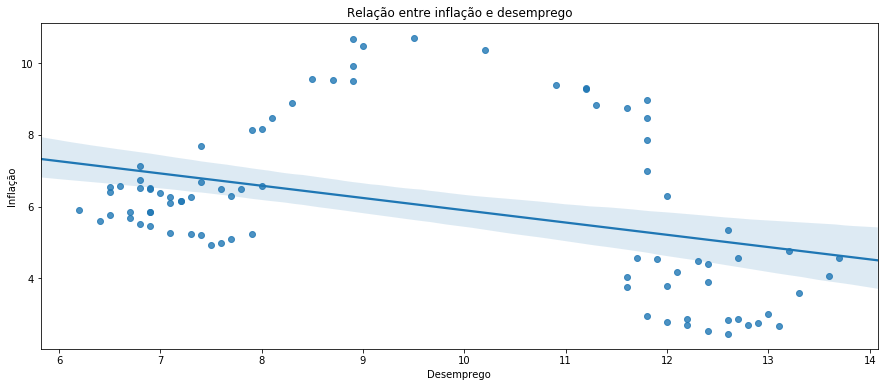

In [43]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='BCB/24369 - Value', y='BCB/13522 - Value', data=series)
ax.set_title('Relação entre inflação e desemprego')
ax.set_xlabel('Desemprego')
ax.set_ylabel('Inflação')
plt.savefig('unemp_inf')
plt.show()

# Índice do Emprego Formal

In [44]:
Emp_Form = quandl.get(["BCB/10802"], trim_start='2000-01-01', trim_end='2019-12-30')

In [45]:
print(Emp_Form.head(10))

            BCB/10802 - Value
Date                         
2001-10-31             6997.0
2001-11-30             7028.0
2001-12-31             6424.0
2002-01-31             6519.0
2002-02-28             6592.0
2002-03-31             8073.0
2002-04-30             7997.0
2002-05-31             8006.0
2002-06-30             8108.0
2002-07-31             8164.0


In [46]:
import matplotlib.pyplot as plt

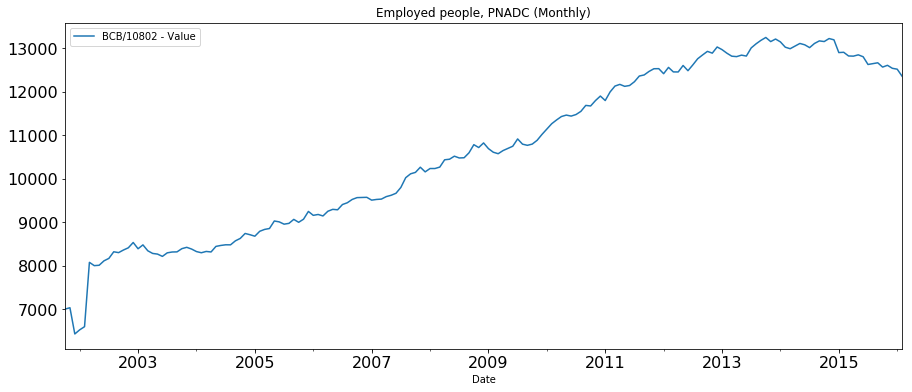

In [47]:
fig, ax = plt.subplots()
Emp_Form[["BCB/10802 - Value"]]["2000-01-01":].plot(ax=ax, fontsize=16);
plt.title('Employed people, PNADC (Monthly)')
plt.savefig('Employed')
plt.show()

# Paraíba

### Operações de crédito

In [48]:
default = quandl.get(["BCB/15939"], trim_start='2002-03-01', trim_end='2020-03-31')

[]

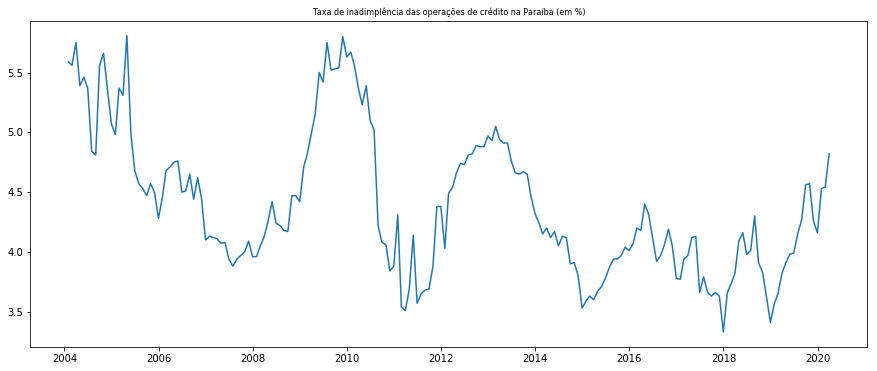

In [49]:
# Plot
plt.plot(default)
plt.title('Taxa de inadimplência das operações de crédito na Paraíba (em %)', fontsize=8)
plt.savefig('default')
plt.plot()

In [50]:
default_corp = quandl.get(["BCB/15907"], trim_start='2002-03-01', trim_end='2020-03-31')

[]

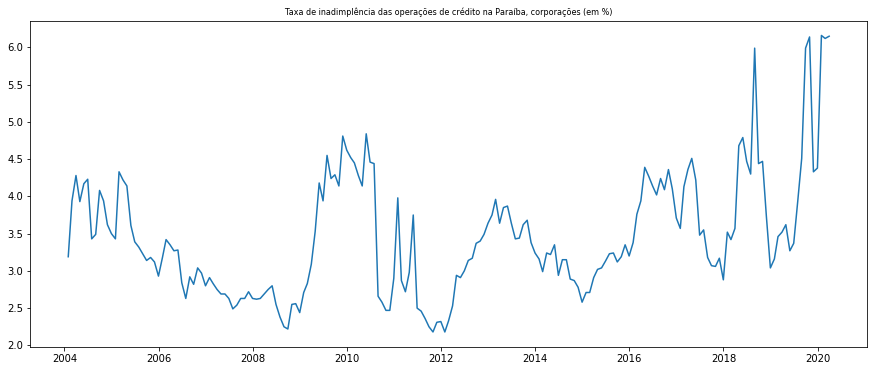

In [51]:
# Plot
plt.plot(default_corp)
plt.title('Taxa de inadimplência das operações de crédito na Paraíba, corporações (em %)', fontsize=8)
plt.savefig('default')
plt.plot()

In [52]:
default_fis = quandl.get(["BCB/15875"], trim_start='2002-03-01', trim_end='2020-03-31')

In [53]:
import os

In [54]:
os.chdir("C:\\Users\\CASSIO\\OneDrive\\UFPB\\Macroeconomia\\Aplicacoes_Python")

In [55]:
default.to_csv("default.csv")

In [56]:
default_corp.to_csv("default_corp.csv")

In [57]:
default_fis.to_csv("default_fis.csv")

In [58]:
a = pd.read_csv("default.csv")
b = pd.read_csv("default_corp.csv")
c = pd.read_csv("default_fis.csv")

In [59]:
merged = a.merge(b).merge(c)
merged.to_csv("default.csv", index=False)

In [60]:
series = read_csv('default.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

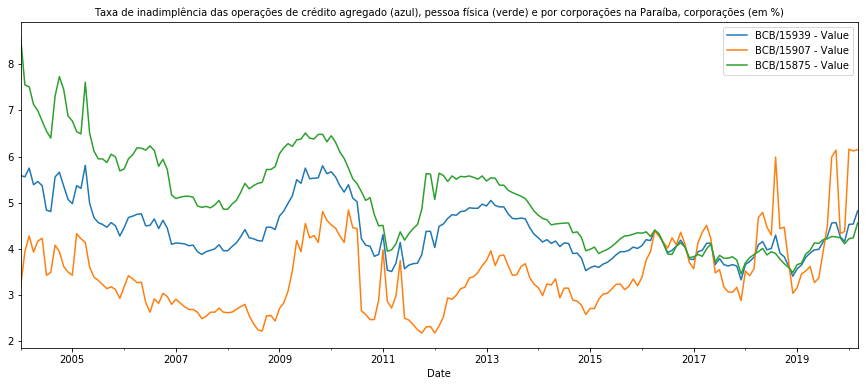

In [61]:
series.plot()
plt.title('Taxa de inadimplência das operações de crédito agregado (azul), pessoa física (verde) e por corporações na Paraíba, corporações (em %)', fontsize=10)
plt.savefig('fig_default')
pyplot.show()

# Dívida estados e municípios

In [62]:
externa = quandl.get(["BCB/4528"], trim_start='2002-03-01', trim_end='2020-03-31')
interna = quandl.get(["BCB/4517"], trim_start='2002-03-01', trim_end='2020-03-31')
total = quandl.get(["BCB/4506"], trim_start='2002-03-01', trim_end='2020-03-31')

In [63]:
externa.to_csv("externa.csv")
interna.to_csv("interna.csv")
total.to_csv("total.csv")

In [64]:
a = pd.read_csv("externa.csv")
b = pd.read_csv("interna.csv")
c = pd.read_csv("total.csv")

In [65]:
merged = a.merge(b).merge(c)
merged.to_csv("divida.csv", index=False)

In [66]:
divida = read_csv('divida.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

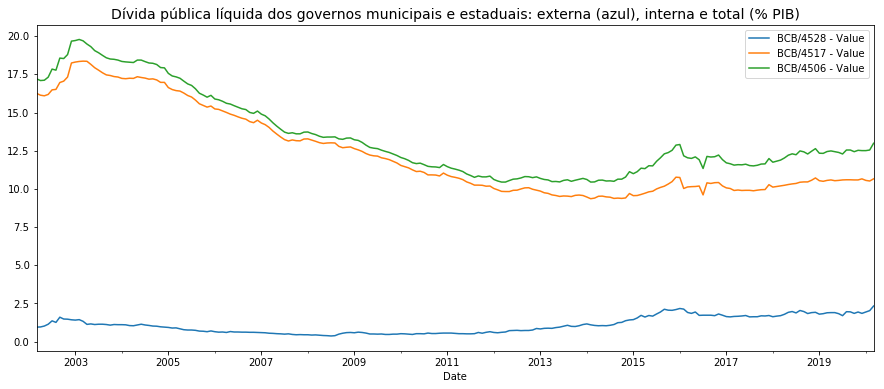

In [67]:
divida.plot()
plt.title('Dívida pública líquida dos governos municipais e estaduais: externa (azul), interna e total (% PIB)', fontsize=14)
plt.savefig('fig_divida')
pyplot.show()